<a href="https://colab.research.google.com/github/federico2018lc/Algebra/blob/main/ETL_EDA_versionFinal_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción, preparación y transformación de datos.
 Para comenzar el analisis, importamos las librerias a utilizar y cargamos los archivos csv para luego realizar etl



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default') #agregamos esto porque hubo algun cambio de estilo
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
clientes=pd.read_csv( 'customer_data.csv')
ventas= pd.read_csv('sales_data.csv')
print(f"Dimensiones de clientes:{clientes.shape} ")
print(f"Dimensiones de ventas:{ventas.shape} ")

Dimensiones de clientes:(99457, 4) 
Dimensiones de ventas:(99457, 7) 


Presentamos el encabezado con algunos datos de cada tabla.

Columnas Clientes: `customer_id; gender; age; payment_method`

Columnas Ventas: `invoice_no customer_id  category  quantity    price invoice_date shopping_mall`

Reconemos la columna en común `customer_id `


In [37]:
print("Tabla Clientes")
print(clientes.head())
print("Tabla Ventas")
print(ventas.head())

Tabla Clientes
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash
Tabla Ventas
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  


`.info` dataframe


In [38]:
print(clientes.info())
print(ventas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB

Agrupación de clientes y ventas - Método Merge


In [39]:
df= pd.merge(ventas, clientes, on='customer_id', how='inner')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   invoice_date    99457 non-null  object 
 6   shopping_mall   99457 non-null  object 
 7   gender          99457 non-null  object 
 8   age             99338 non-null  float64
 9   payment_method  99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [41]:
df.dropna (subset=['age'], inplace=True) #elimino los 119 registros vacios, ya que esa cantidad no afecta la muestra de 99338 valores


In [42]:
df.isnull().sum()

invoice_no        0
customer_id       0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
gender            0
age               0
payment_method    0
dtype: int64

Busqueda de duplicados

`np.int64(0)` indica que no hay datos duplicados

In [43]:
df.duplicated().sum()

np.int64(0)

#Estudio por Columnas:
Las columnas que no analizaremos: `'invoice_no', 'customer_id',`

Columnas con datos numéricos: `'quantity', 'price','age',`

Columnas con datos categoricos: `'category', 'invoice_date', 'shopping_mall', 'gender', 'payment_method'`

# Estadística básica sobre Datos Numéricos. Método `.describe()`


In [44]:
df.describe().round(2)

quantity     price       age
count  99338.00  99338.00  99338.00
mean       3.00    689.30     43.43
std        1.41    941.37     14.99
min        1.00      5.23     18.00
25%        2.00     45.45     30.00
50%        3.00    203.30     43.00
75%        4.00   1200.32     56.00
max        5.00   5250.00     69.00

In [45]:
df_num = df.select_dtypes(exclude='object')

fig = make_subplots(rows=1, cols=len(df_num.columns), shared_xaxes=False, shared_yaxes=False)

for x in np.arange(0, len(df_num.columns), 1) :

  fig.add_trace(go.Box(y=df_num[df_num.columns[x]], name=df_num.columns[x], boxpoints='suspectedoutliers'), row=1, col=x+1)

fig.show()

# Conteo datos categoricos: ( Object )

In [46]:
columnus = ['gender', 'payment_method', 'category','quantity', 'shopping_mall', ]

for col in columnus:
    print(f"Columna: {col}")
    conteo = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True) * 100
    resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
    print(resultado)
    print('------------------')

Columna: gender
        Cantidad  Porcentaje (%)
gender                          
Female     59412           59.81
Male       39926           40.19
------------------
Columna: payment_method
                Cantidad  Porcentaje (%)
payment_method                          
Cash               44397           44.69
Credit Card        34898           35.13
Debit Card         20043           20.18
------------------
Columna: category
                 Cantidad  Porcentaje (%)
category                                 
Clothing            34445           34.67
Cosmetics           15084           15.18
Food & Beverage     14761           14.86
Toys                10071           10.14
Shoes               10015           10.08
Technology           4995            5.03
Souvenir             4991            5.02
Books                4976            5.01
------------------
Columna: quantity
          Cantidad  Porcentaje (%)
quantity                          
3            20128           20.26
5    

# Rango de fechas


In [47]:
ventas['invoice_date'].min(), ventas['invoice_date'].max()

('01-01-2021', '31-12-2022')

Eliminaciones finales

In [97]:
df = df.drop(['invoice_no', 'customer_id'], axis=1)

# Insight 4

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, 0 to 99456
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        99338 non-null  object 
 1   quantity        99338 non-null  int64  
 2   price           99338 non-null  float64
 3   invoice_date    99338 non-null  object 
 4   shopping_mall   99338 non-null  object 
 5   gender          99338 non-null  object 
 6   age             99338 non-null  float64
 7   payment_method  99338 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.8+ MB


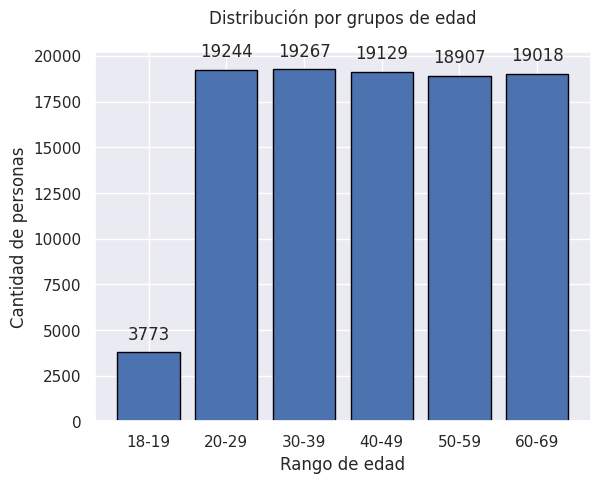

In [93]:
# Definir los intervalos
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69']

# Crear la serie auxiliar
grupo_edades = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_edades.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por grupos de edad', pad=20)
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de personas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

In [113]:
# Definir los intervalos
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69']

df['categoria_edad'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)
df.head(5)

category  quantity    price invoice_date   shopping_mall  gender   age  \
0  Clothing         5  1500.40   05-08-2022          Kanyon  Female  28.0   
1     Shoes         3  1800.51   12-12-2021  Forum Istanbul    Male  21.0   
2  Clothing         1   300.08   09-11-2021       Metrocity    Male  20.0   
3     Shoes         5  3000.85   16-05-2021    Metropol AVM  Female  66.0   
4     Books         4    60.60   24-10-2021          Kanyon  Female  53.0   

  payment_method categoria_edad  
0    Credit Card          20-29  
1     Debit Card          20-29  
2           Cash          20-29  
3    Credit Card          60-69  
4           Cash          50-59

In [114]:
df['categoria_edad'].value_counts()

categoria_edad
30-39    19267
20-29    19244
40-49    19129
60-69    19018
50-59    18907
18-19     3773
Name: count, dtype: int64

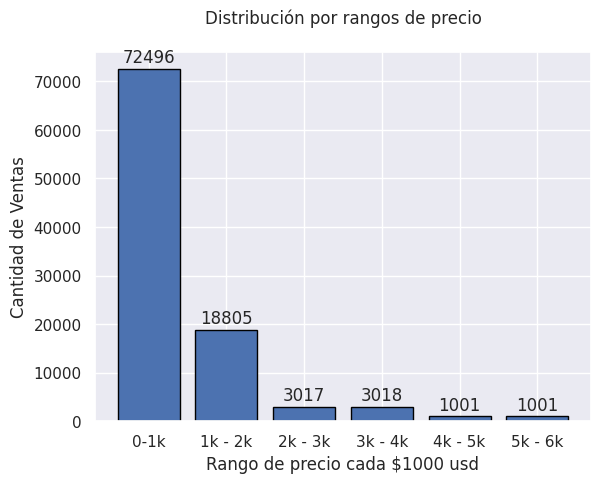

In [95]:
# Definir los intervalos
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['0-1k', '1k - 2k', '2k - 3k', '3k - 4k', '4k - 5k', '5k - 6k']

# Crear la serie auxiliar
grupo_precio = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_precio.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por rangos de precio', pad=20)
plt.xlabel('Rango de precio cada $1000 usd')
plt.ylabel('Cantidad de Ventas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

In [115]:
# Definir los intervalos
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['0-1k', '1k - 2k', '2k - 3k', '3k - 4k', '4k - 5k', '5k - 6k']

df['categoria_precio'] = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)
print(df.head(5))

   category  quantity    price invoice_date   shopping_mall  gender   age  \
0  Clothing         5  1500.40   05-08-2022          Kanyon  Female  28.0   
1     Shoes         3  1800.51   12-12-2021  Forum Istanbul    Male  21.0   
2  Clothing         1   300.08   09-11-2021       Metrocity    Male  20.0   
3     Shoes         5  3000.85   16-05-2021    Metropol AVM  Female  66.0   
4     Books         4    60.60   24-10-2021          Kanyon  Female  53.0   

  payment_method categoria_edad categoria_precio  
0    Credit Card          20-29          1k - 2k  
1     Debit Card          20-29          1k - 2k  
2           Cash          20-29             0-1k  
3    Credit Card          60-69          3k - 4k  
4           Cash          50-59             0-1k  


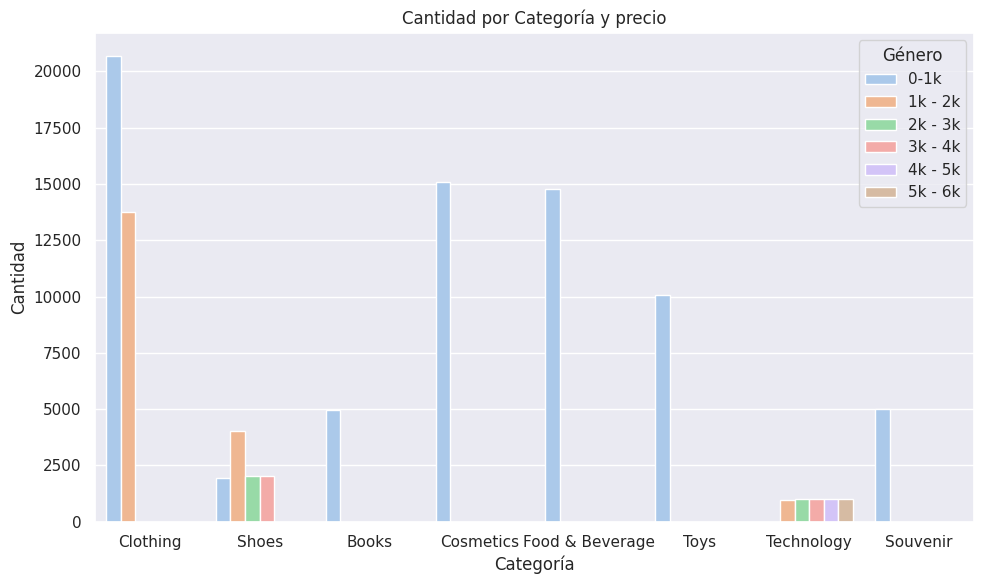

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', hue='categoria_precio', palette='pastel')

plt.title('Cantidad por Categoría y precio')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

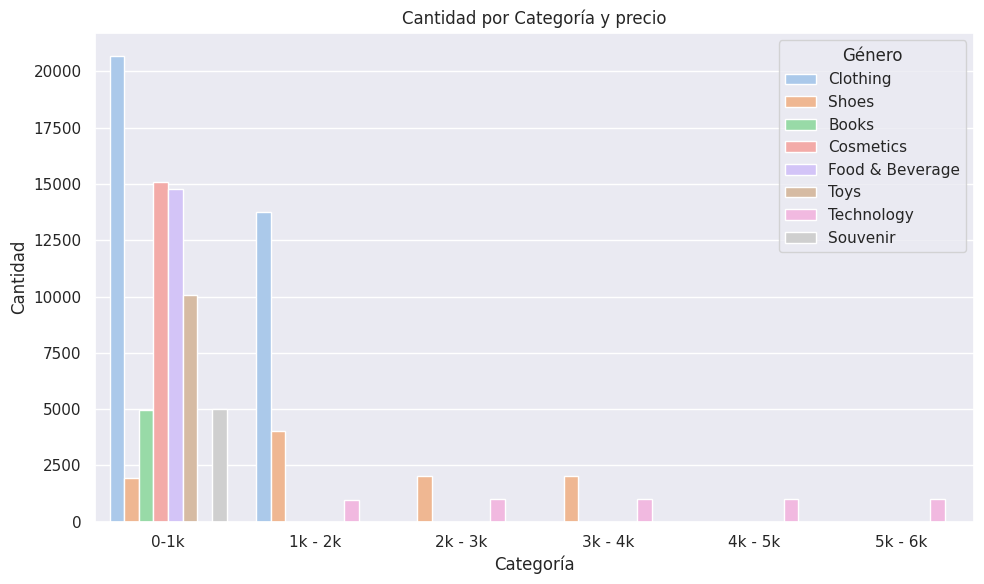

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='categoria_precio', hue='category', palette='pastel')

plt.title('Cantidad por Categoría y precio')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

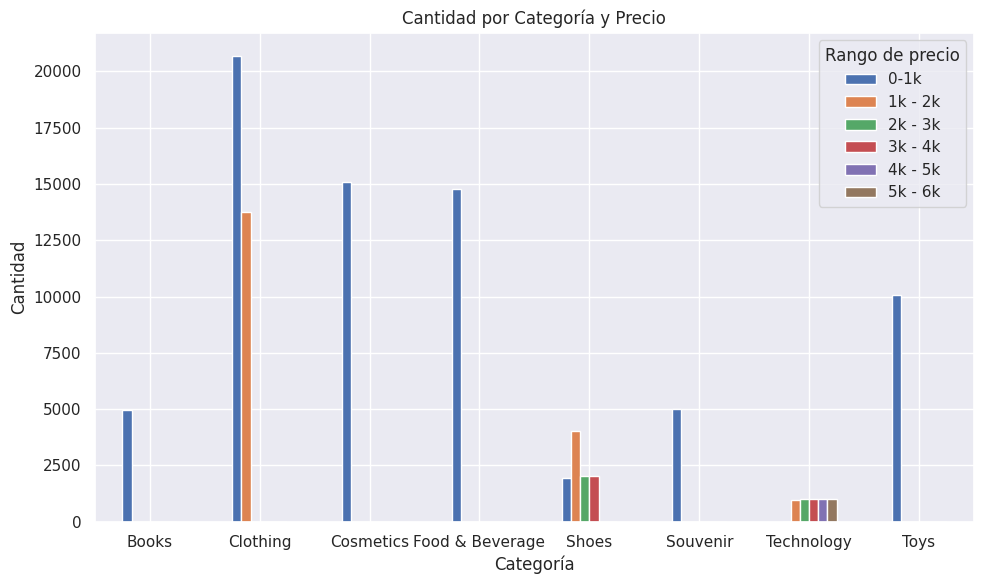

In [118]:
# Tabla de frecuencias
tabla = pd.crosstab(df['category'], df['categoria_precio'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))

plt.title('Cantidad por Categoría y Precio')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.legend(title='Rango de precio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


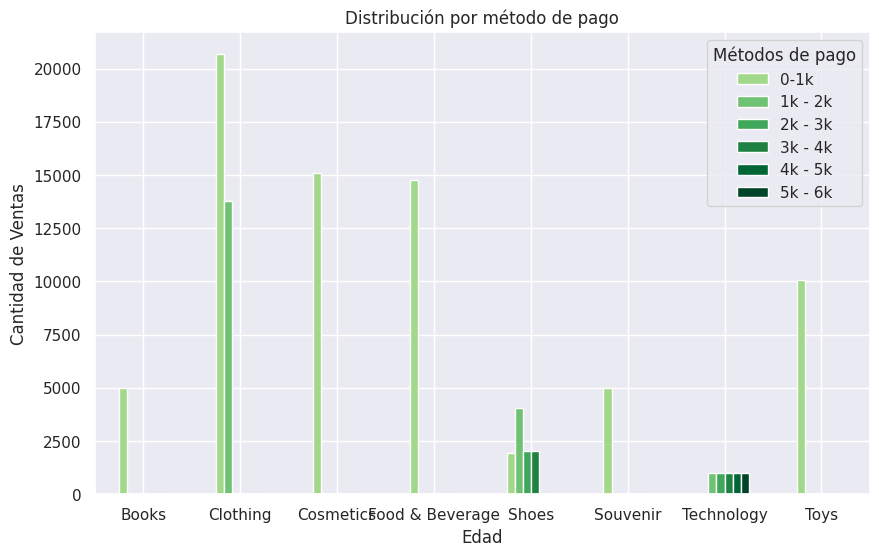

In [120]:
# Tabla de frecuencias
tabla = pd.crosstab(df['category'], df['categoria_precio'])
# Gráfico de barras agrupadas
paleta = plt.cm.YlGn(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

Veamos cuanto dinero se genero por venta

In [121]:
df['importe_total'] = df['price'] * df['quantity']
df.head(5)

category  quantity    price invoice_date   shopping_mall  gender   age  \
0  Clothing         5  1500.40   05-08-2022          Kanyon  Female  28.0   
1     Shoes         3  1800.51   12-12-2021  Forum Istanbul    Male  21.0   
2  Clothing         1   300.08   09-11-2021       Metrocity    Male  20.0   
3     Shoes         5  3000.85   16-05-2021    Metropol AVM  Female  66.0   
4     Books         4    60.60   24-10-2021          Kanyon  Female  53.0   

  payment_method categoria_edad categoria_precio  importe_total  
0    Credit Card          20-29          1k - 2k        7502.00  
1     Debit Card          20-29          1k - 2k        5401.53  
2           Cash          20-29             0-1k         300.08  
3    Credit Card          60-69          3k - 4k       15004.25  
4           Cash          50-59             0-1k         242.40

In [123]:
df['importe_total'].describe()

count    99338.000000
mean      2529.027490
std       4223.330038
min          5.230000
25%        136.350000
50%        600.170000
75%       2700.720000
max      26250.000000
Name: importe_total, dtype: float64

In [125]:
px.box(data_frame=df, y='importe_total',width=400, height=500 )

In [127]:
dinero_por_categoria = df.groupby('category')['importe_total'].sum()
print(dinero_por_categoria)

category
Books              8.334772e+05
Clothing           1.138696e+08
Cosmetics          6.787089e+06
Food & Beverage    8.486826e+05
Shoes              6.642201e+07
Souvenir           6.344405e+05
Technology         5.785815e+07
Toys               3.975122e+06
Name: importe_total, dtype: float64


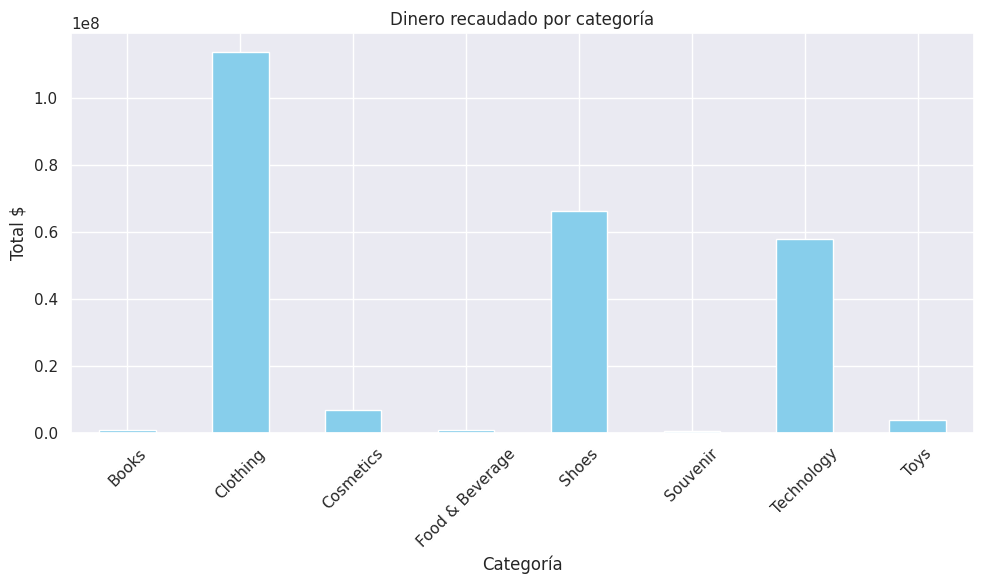

In [129]:
# Suponiendo que tu variable se llama dinero_por_categoria
dinero_por_categoria.plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title('Dinero recaudado por categoría')
plt.ylabel('Total $')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [137]:
df_clothing = df[df['category'] == 'Clothing']['price']
df_clothing.value_counts()

price
600.16     6939
1500.40    6935
900.24     6899
1200.32    6838
300.08     6834
Name: count, dtype: int64

In [183]:
df_clothing = df[df['category'] == 'Clothing'][['price','gender','payment_method','importe_total', 'categoria_precio']]
df_clothing.head(5)

price  gender payment_method  importe_total categoria_precio
0  1500.40  Female    Credit Card        7502.00          1k - 2k
2   300.08    Male           Cash         300.08             0-1k
5  1500.40  Female    Credit Card        7502.00          1k - 2k
7   600.16  Female    Credit Card        1200.32             0-1k
8   900.24    Male    Credit Card        2700.72             0-1k

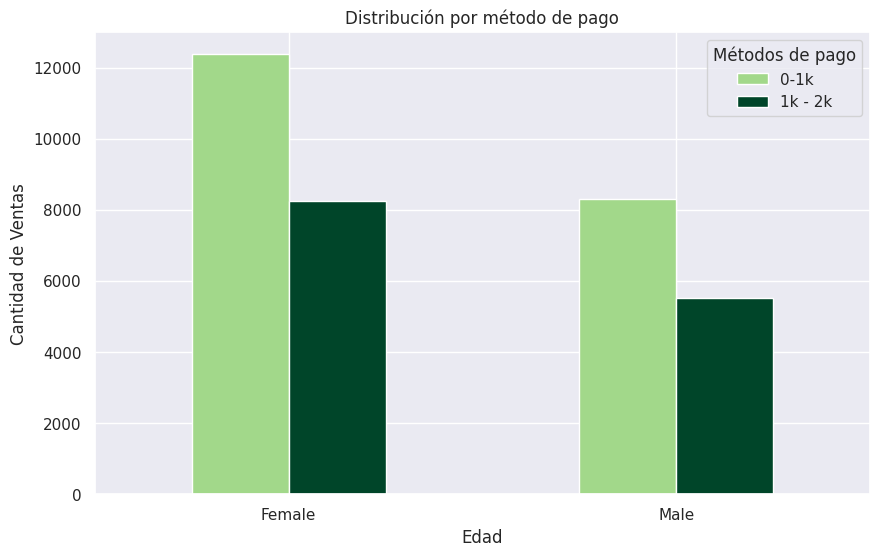

In [184]:
# Tabla de frecuencias
tabla = pd.crosstab(df_clothing['gender'], df['categoria_precio'])
# Gráfico de barras agrupadas
paleta = plt.cm.YlGn(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

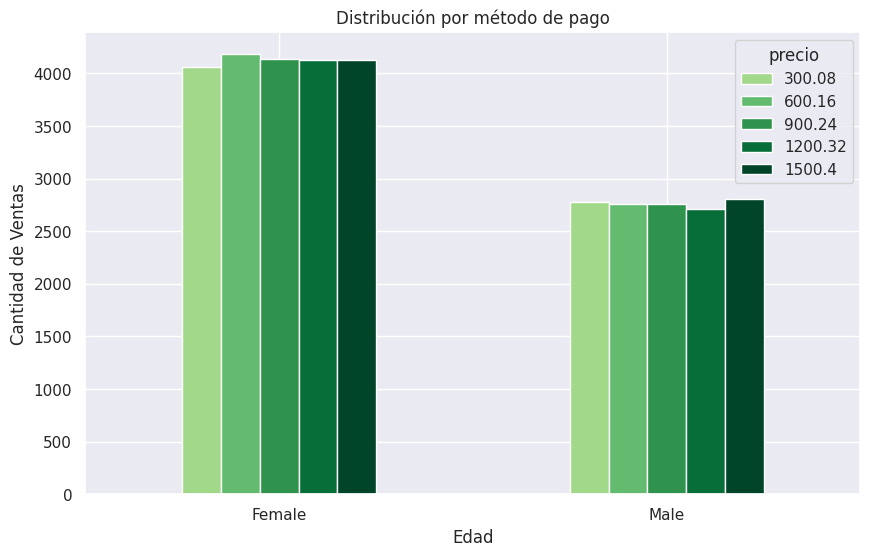

In [185]:
# Tabla de frecuencias
tabla = pd.crosstab(df_clothing['gender'], df['price'])
# Gráfico de barras agrupadas
paleta = plt.cm.YlGn(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='precio')

plt.show()

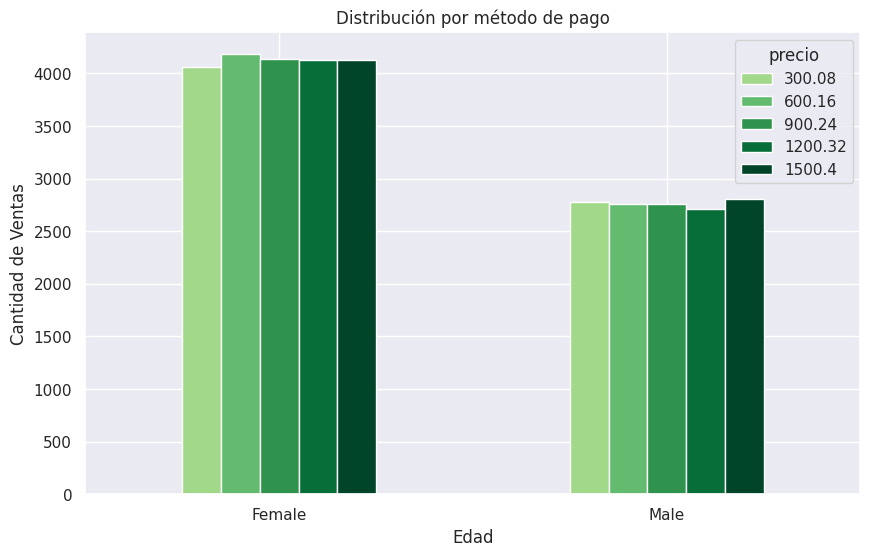

In [186]:
# Tabla de frecuencias
tabla = pd.crosstab(df_clothing['gender'], df['price'])
# Gráfico de barras agrupadas
paleta = plt.cm.YlGn(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='precio')

plt.show()

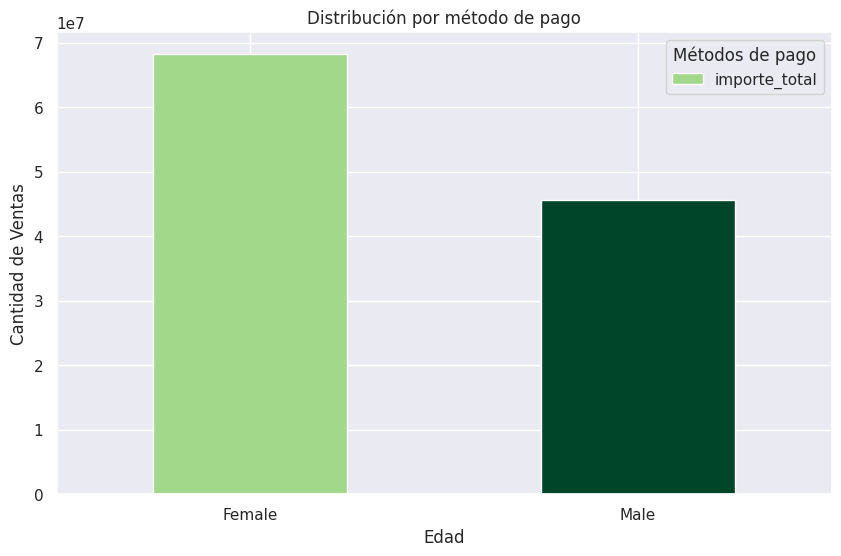

In [187]:
tabla = df_clothing.groupby('gender')['importe_total'].sum()
paleta = plt.cm.YlGn(np.linspace(0.4, 1,2))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

In [188]:
tabla1=tabla
print(tabla1)

gender
Female    68195280.56
Male      45674276.56
Name: importe_total, dtype: float64


In [189]:
df_Technology = df[df['category'] == 'Technology'][['price','gender','payment_method','importe_total', 'categoria_precio']]
df_clothing.head(5)


price  gender payment_method  importe_total categoria_precio
0  1500.40  Female    Credit Card        7502.00          1k - 2k
2   300.08    Male           Cash         300.08             0-1k
5  1500.40  Female    Credit Card        7502.00          1k - 2k
7   600.16  Female    Credit Card        1200.32             0-1k
8   900.24    Male    Credit Card        2700.72             0-1k

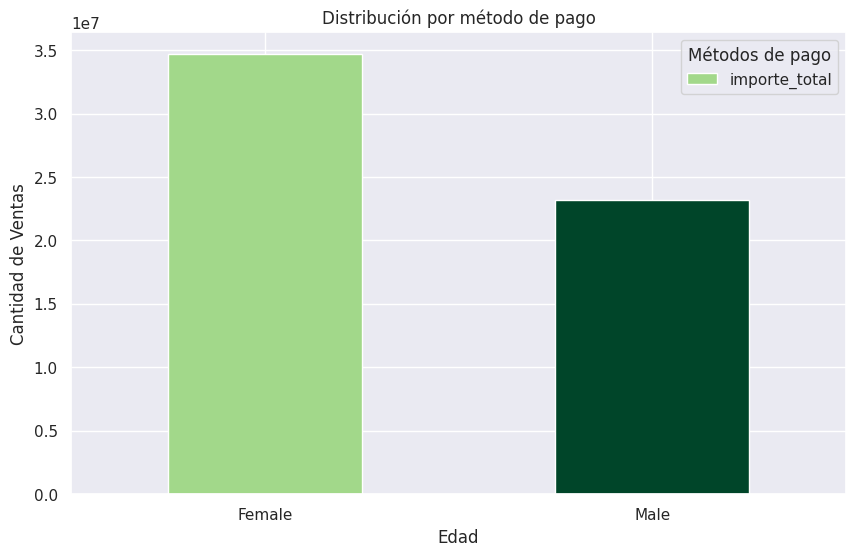

In [190]:
tabla = df_Technology.groupby('gender')['importe_total'].sum()
paleta = plt.cm.YlGn(np.linspace(0.4, 1,2))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

In [191]:
tabla2=tabla
print(tabla2)

gender
Female    34669950.0
Male      23188200.0
Name: importe_total, dtype: float64


In [192]:
df_Shoes = df[df['category'] == 'Shoes'][['price','gender','payment_method','importe_total', 'categoria_precio']]
df_Shoes.head(5)

price  gender payment_method  importe_total categoria_precio
1   1800.51    Male     Debit Card        5401.53          1k - 2k
3   3000.85  Female    Credit Card       15004.25          3k - 4k
15  3000.85    Male    Credit Card       15004.25          3k - 4k
27  2400.68    Male           Cash        9602.72          2k - 3k
28  1800.51  Female           Cash        5401.53          1k - 2k

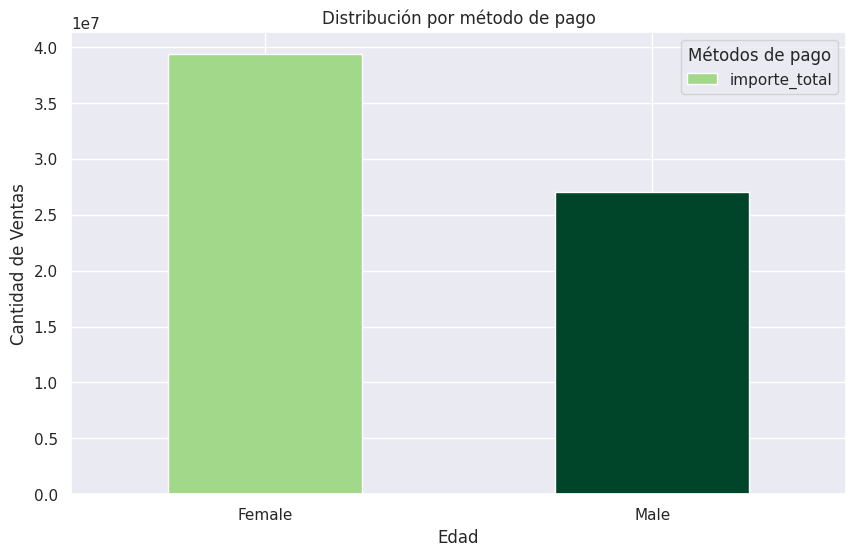

In [199]:
tabla3 = df_Shoes.groupby('gender')['importe_total'].sum()
paleta = plt.cm.YlGn(np.linspace(0.4, 1,2))
tabla3.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

In [194]:
df_importe_por_genero= pd.merge(tabla1, tabla2, on='gender', how='inner')

In [195]:
# Merge the result with tabla3
df_importe_por_genero = pd.merge(df_importe_por_genero, tabla3, on='gender', how='inner')

print(df_importe_por_genero)

        importe_total_x  importe_total_y  importe_total
gender                                                 
Female      68195280.56       34669950.0    39354347.24
Male        45674276.56       23188200.0    27067667.00


In [196]:
df_importe_por_genero.head(5)

importe_total_x  importe_total_y  importe_total
gender                                                 
Female      68195280.56       34669950.0    39354347.24
Male        45674276.56       23188200.0    27067667.00

In [197]:
df_importe_por_genero = df_importe_por_genero.rename(columns={'importe_total_x': 'Clothings', 'importe_total_y': 'Technology','importe_total':'Shoes'})
df_importe_por_genero.head(5)

Clothings  Technology        Shoes
gender                                      
Female  68195280.56  34669950.0  39354347.24
Male    45674276.56  23188200.0  27067667.00

Text(0.5, 0, 'Categoría')

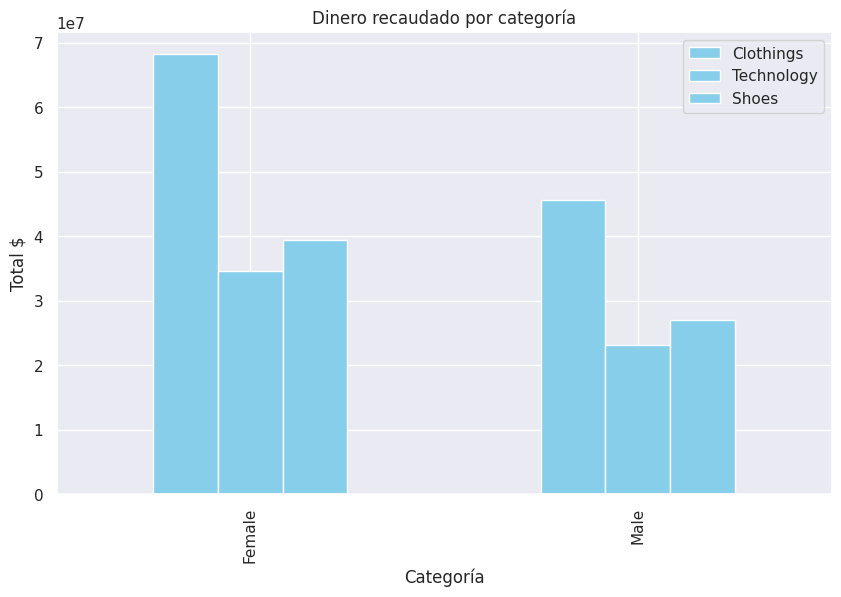

In [198]:
df_importe_por_genero.plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title('Dinero recaudado por categoría')
plt.ylabel('Total $')
plt.xlabel('Categoría')

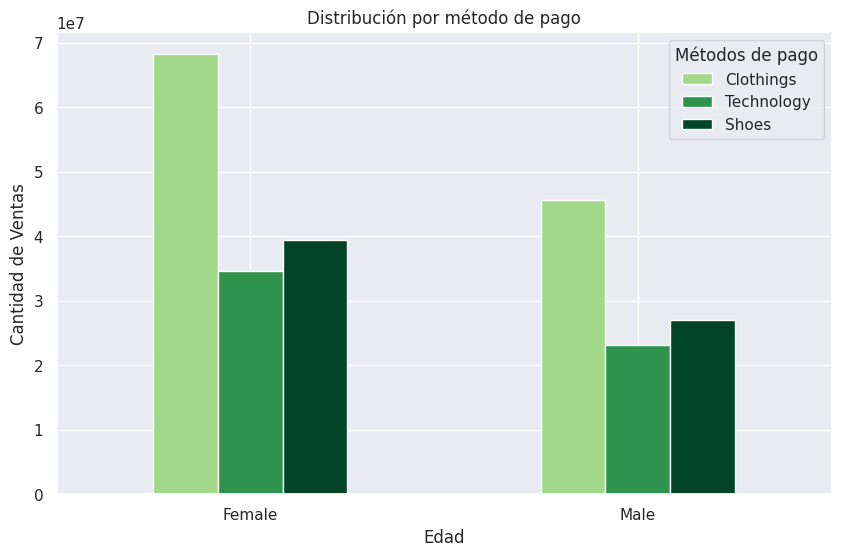

In [202]:
paleta = plt.cm.YlGn(np.linspace(0.4, 1,3))
df_importe_por_genero.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

# Insight 1
1) metodos de pago

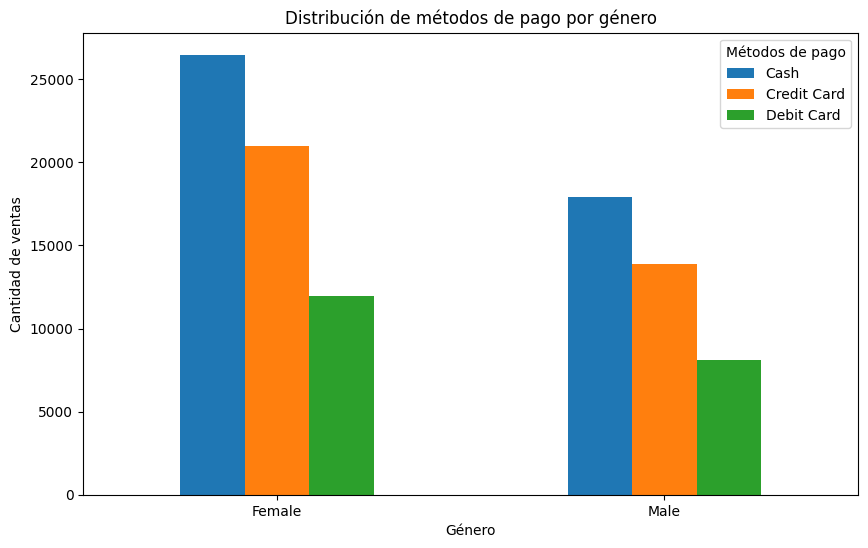

In [49]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')
plt.show()

<Axes: xlabel='payment_method', ylabel='gender'>

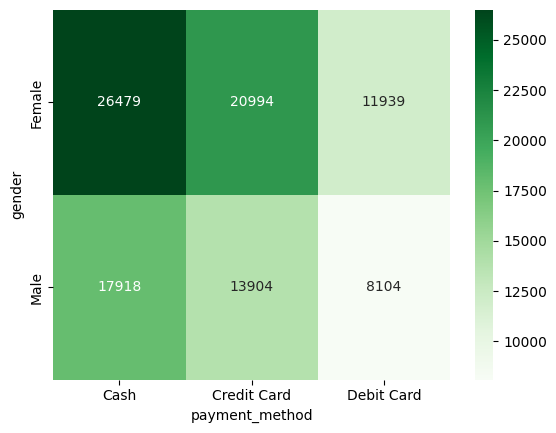

In [50]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

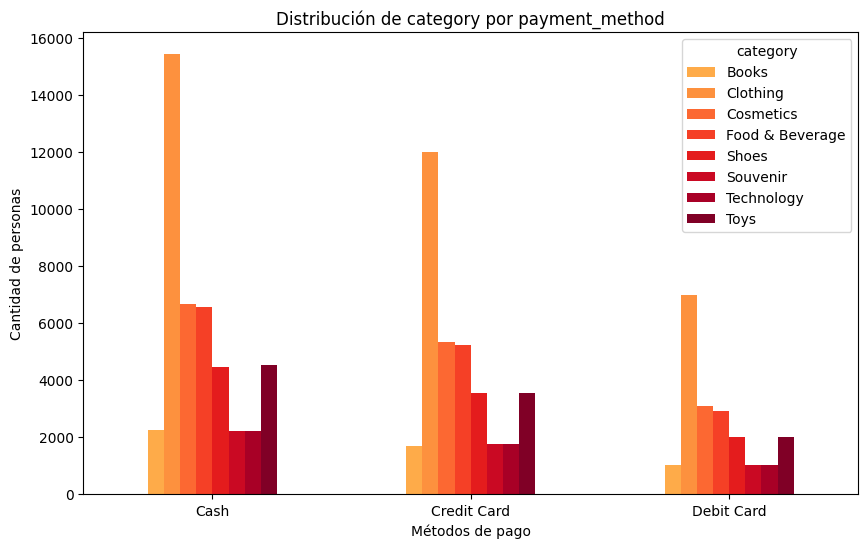

In [51]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por payment_method')
plt.xlabel('Métodos de pago')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

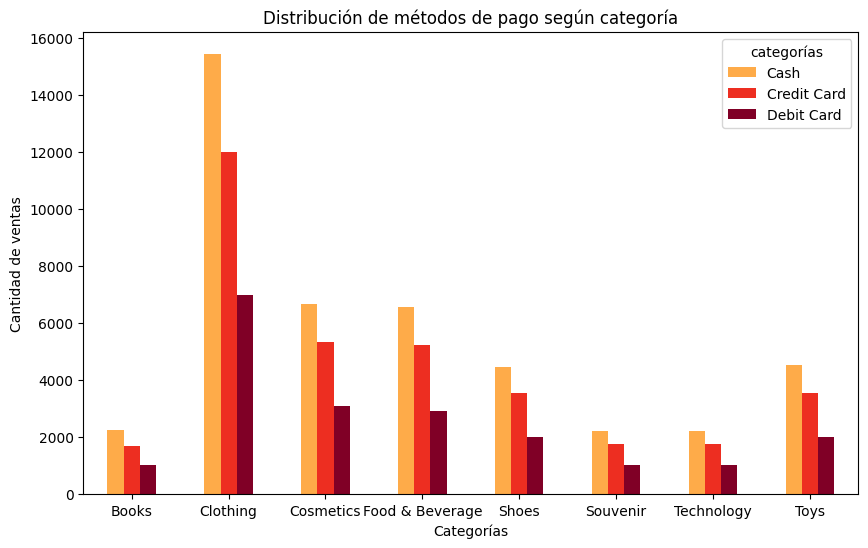

In [52]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['category'], df['payment_method'],)

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de métodos de pago según categoría')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='categorías')

plt.show()

# insight 2
Analizaremos diferentes relaciones respecto al género

/tmp/ipython-input-2710415346.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




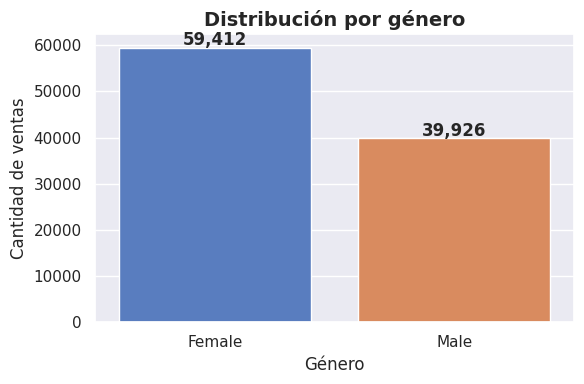

In [53]:
# Datos
valores = df['gender'].value_counts().reset_index()
valores.columns = ['Género', 'Cantidad']

# Estilo de Seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=valores, x='Género', y='Cantidad', palette='muted')

# Título y etiquetas
plt.title('Distribución por género', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(valores['Cantidad']):
    ax.text(i, v + (v*0.01), f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

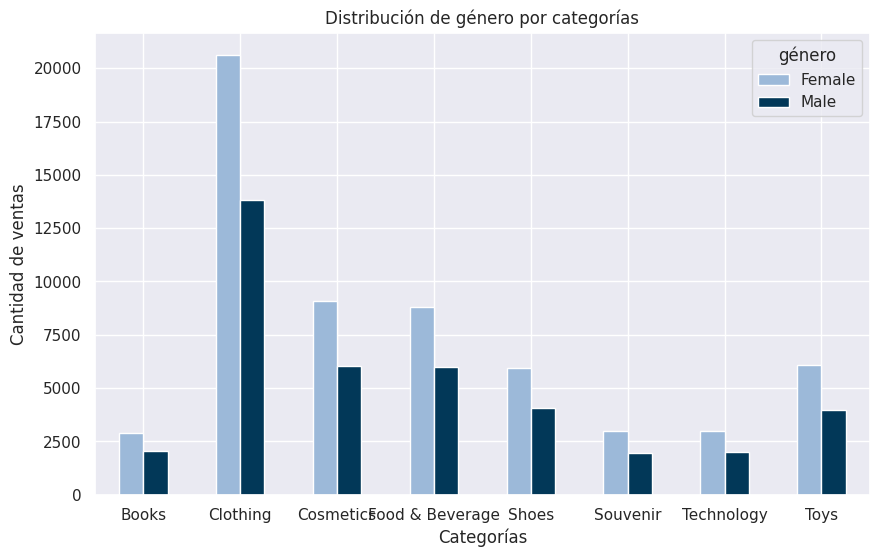

In [54]:
# Tabla cruzada: filas = gender, columnas = gender
tabla = pd.crosstab(df['category'], df['gender'],)

# Gráfico de barras agrupadas
paleta = plt.cm.PuBu(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de género por categorías')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='género')

plt.show()

# insight 3
Rango etario de 25 a 35

**Mucha atención:** Dependiendo de como se haga la distribución puede parecer que los extremos tengas muchas ventas o pocas ventas.

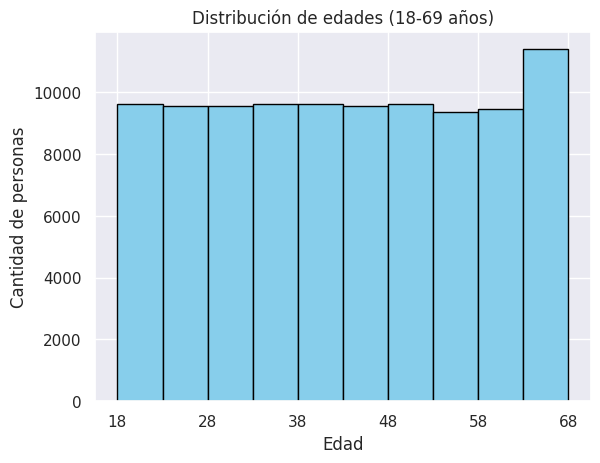

In [55]:
plt.hist(df['age'].dropna(), bins=range(18, 69, 5), color='skyblue', edgecolor='black')
plt.title('Distribución de edades (18-69 años)')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.xticks(range(18, 69, 10))
plt.show()

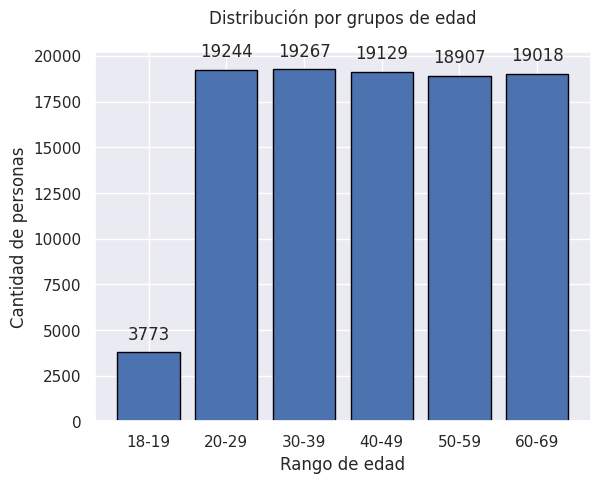

In [56]:
# Definir los intervalos
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69']

# Crear la serie auxiliar
grupo_edades = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_edades.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por grupos de edad', pad=20)
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de personas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

Teniendo en cuenta estos detalles prosigamos con el analisis


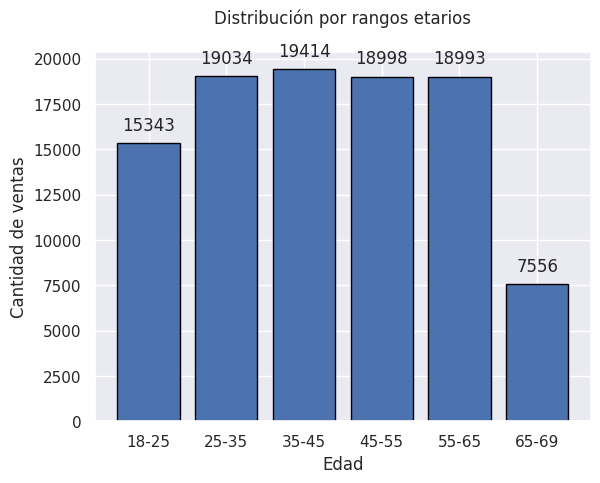

In [57]:
# Definir los intervalos
bins = [18, 25, 35, 45, 55, 65, 69]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65-69']

# Crear la serie auxiliar
grupo_edades = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_edades.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por rangos etarios', pad=20)
plt.xlabel('Edad')
plt.ylabel('Cantidad de ventas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

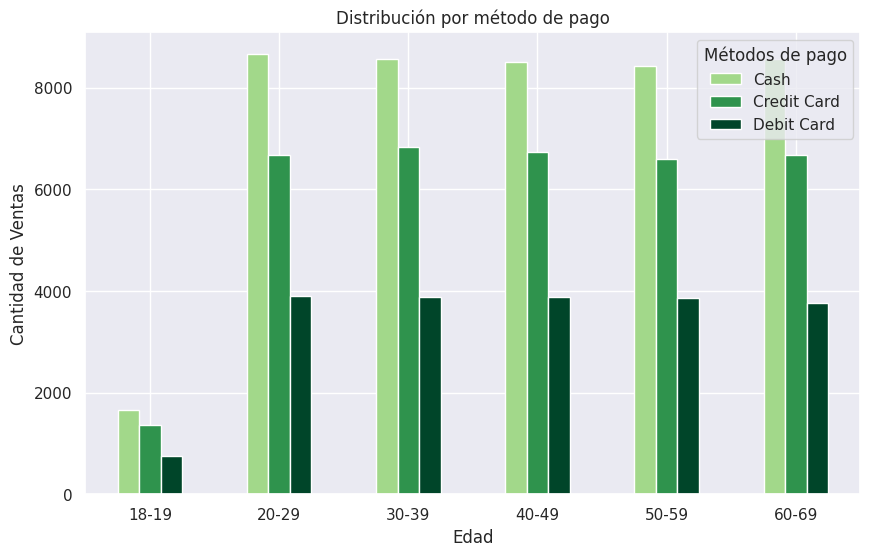

In [94]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab( grupo_edades,df['payment_method'],)

# Gráfico de barras agrupadas
paleta = plt.cm.YlGn(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

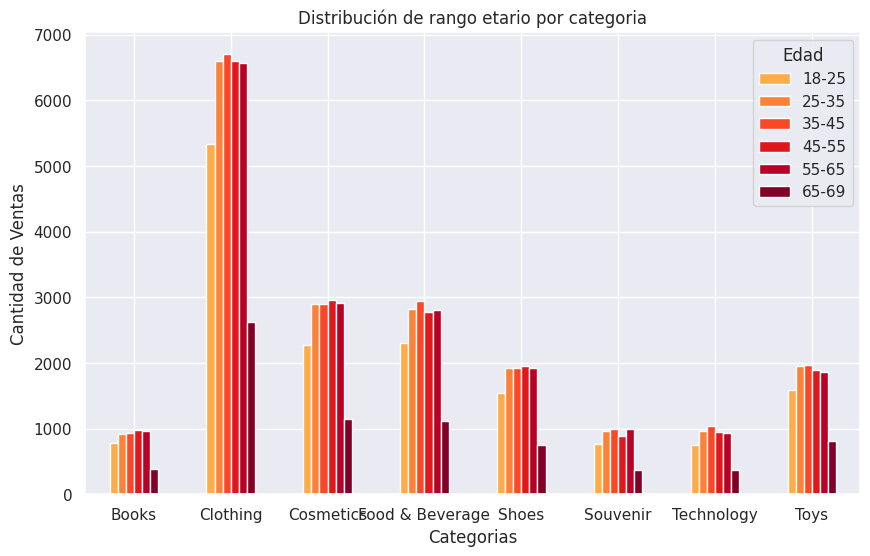

In [59]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['category'], grupo_edades,)

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de rango etario por categoria')
plt.xlabel('Categorias')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Edad')

plt.show()

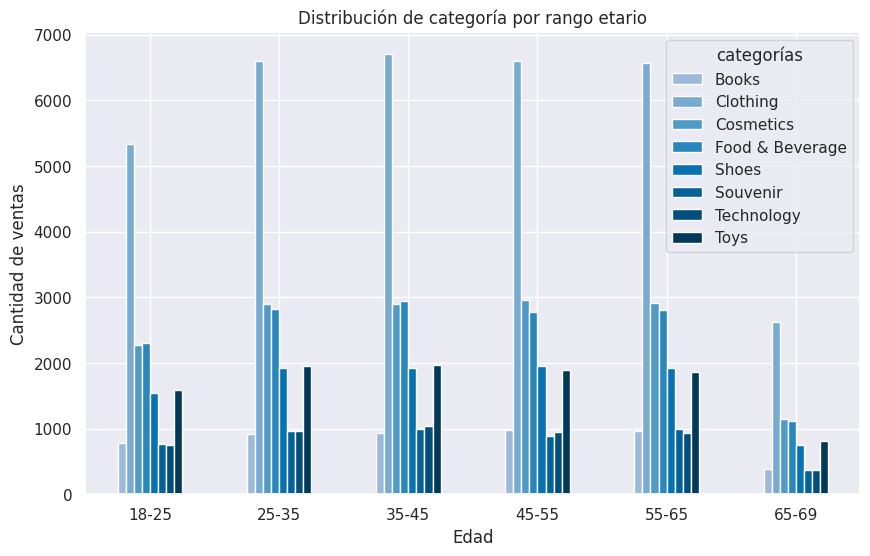

In [60]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab( grupo_edades,df['category'],)

# Gráfico de barras agrupadas
paleta = plt.cm.PuBu(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de categoría por rango etario')
plt.xlabel('Edad')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='categorías')

plt.show()

#Gráficos

# Género `gender`

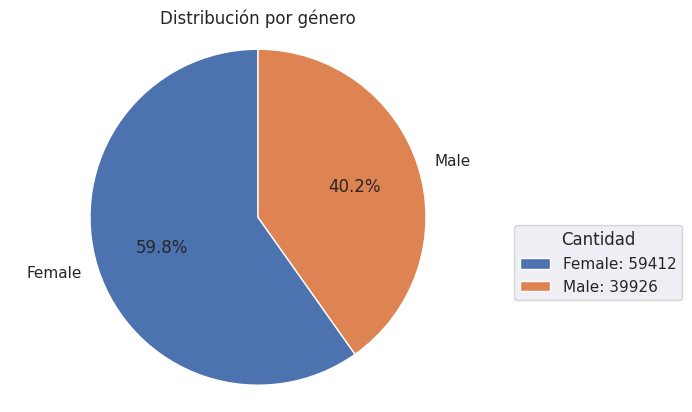

In [61]:
# Contar los valores de la columna
valores = df['gender'].value_counts()

# Crear el gráfico circular
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por género')
plt.axis('equal')  # Hace que el círculo no se vea ovalado

# Crear texto para la leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]

# Agregar la leyenda (cuadro)
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.show()

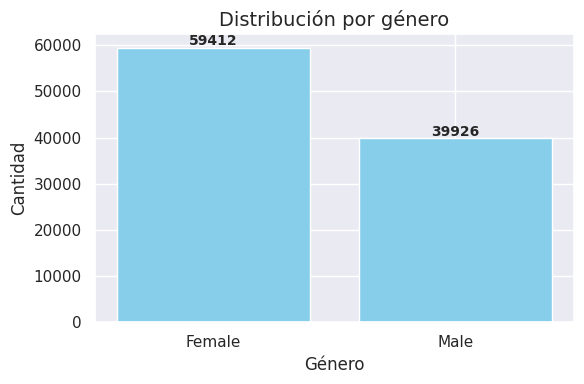

In [62]:

# Contar los valores
valores = df['gender'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(valores.index, valores.values, color='skyblue')

# Título y etiquetas
plt.title('Distribución por género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar valores arriba de cada barra
for i, v in enumerate(valores.values):
    plt.text(i, v + (v*0.01), str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4027107392.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




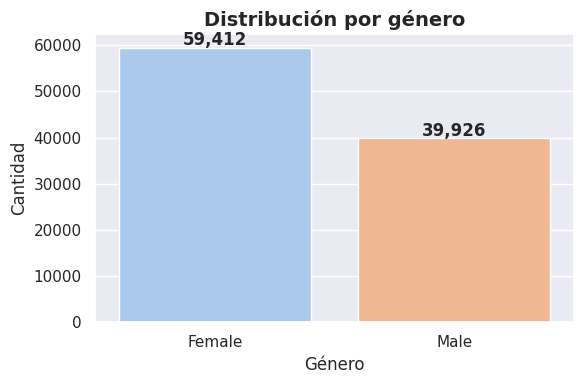

In [63]:
# Datos
valores = df['gender'].value_counts().reset_index()
valores.columns = ['Género', 'Cantidad']

# Estilo de Seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=valores, x='Género', y='Cantidad', palette='pastel')

# Título y etiquetas
plt.title('Distribución por género', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(valores['Cantidad']):
    ax.text(i, v + (v*0.01), f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# Edad `age`

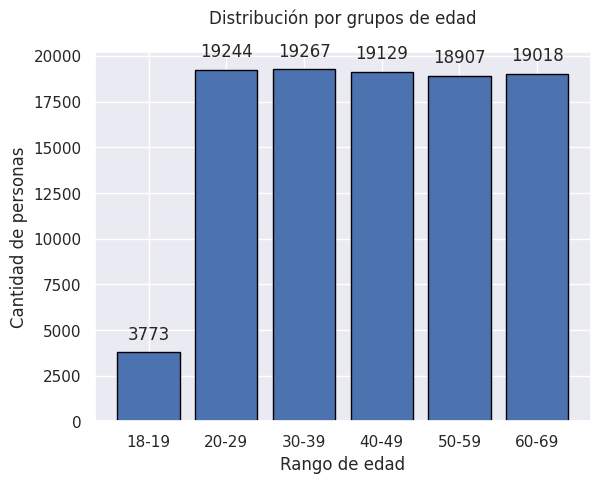

In [64]:

# Definir los intervalos
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69']

# Crear la serie auxiliar
grupo_edades = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_edades.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por grupos de edad', pad=20)
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de personas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

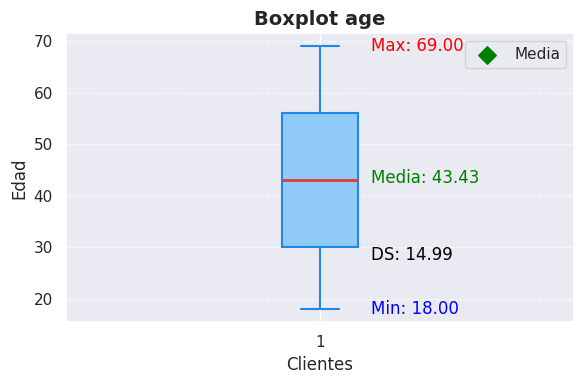

In [65]:

# 📌 Calcular estadísticas
media = df['age'].mean()
std = df['age'].std()
min_val = df['age'].min()
max_val = df['age'].max()

plt.figure(figsize=(6,4))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df['age'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot age', fontsize=14, fontweight='bold')
plt.xlabel('Clientes')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [66]:
px.box(data_frame=df, y='price',width=400, height=500 )

# Método de pago `payment_method`

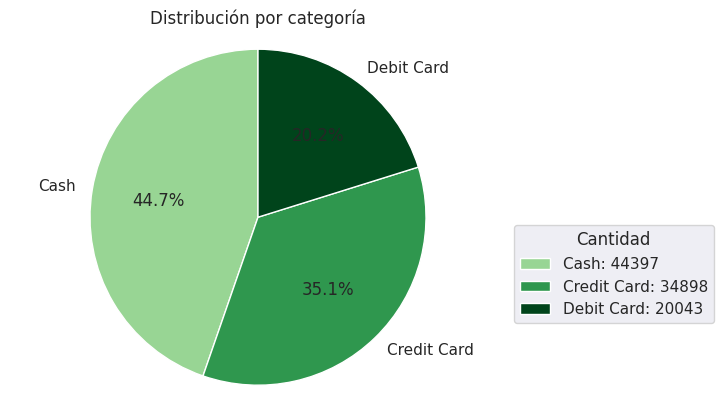

In [67]:
import numpy as np

# Contar los valores de la columna
valores = df['payment_method'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
# Crear texto para la leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]

# Agregar la leyenda (cuadro)
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

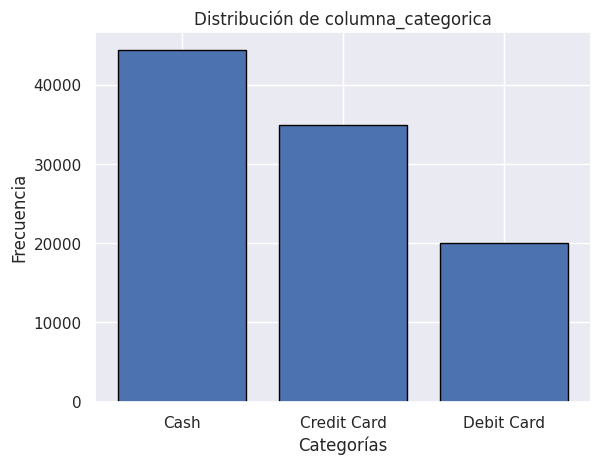

In [68]:
# Contar cuántas veces aparece cada categoría
valores = df['payment_method'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

plt.show()

/tmp/ipython-input-4088891684.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




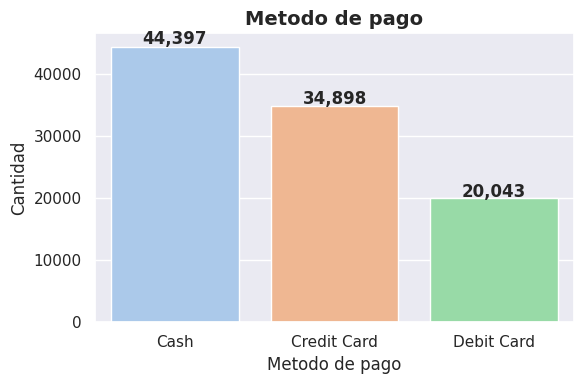

In [69]:
# Datos
valores = df['payment_method'].value_counts().reset_index()
valores.columns = ['Metodo de pago', 'Cantidad']

# Estilo de Seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=valores, x='Metodo de pago', y='Cantidad', palette='pastel')

# Título y etiquetas
plt.title('Metodo de pago', fontsize=14, fontweight='bold')
plt.xlabel('Metodo de pago', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(valores['Cantidad']):
    ax.text(i, v + (v*0.01), f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# Categorias de compras `category`

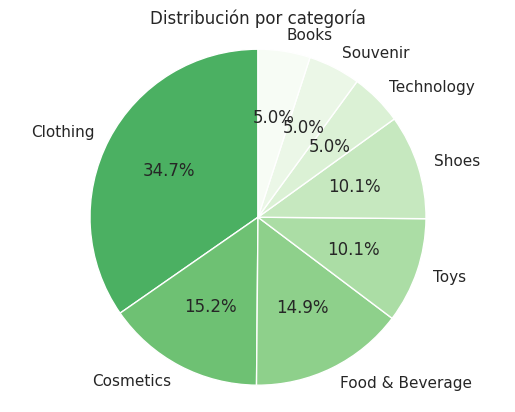

In [70]:

# Contar los valores de la columna
valores = df['category'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

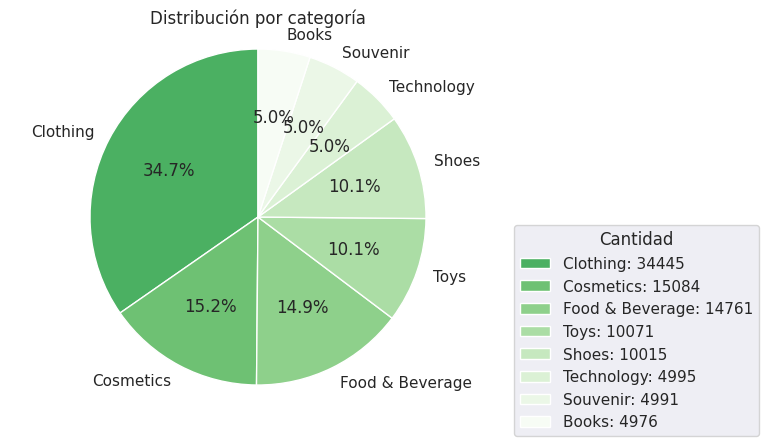

In [71]:
# Contar los valores de la columna
valores = df['category'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens_r(np.linspace(0.4, 1, len(valores)))


plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)

# Crear texto para la leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]
# Agregar la leyenda (cuadro)
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()


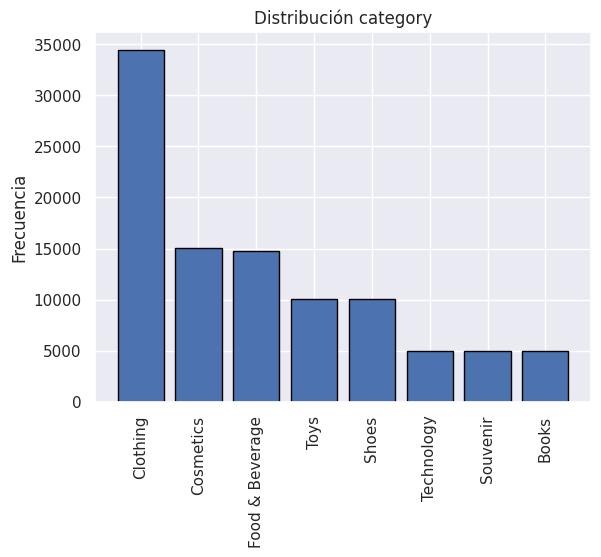

In [72]:
# Contar cuántas veces aparece cada categoría
valores = df['category'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución category')
#plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

# QUANTY

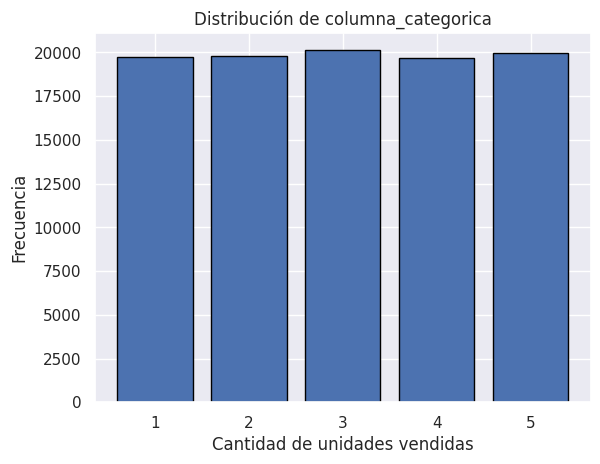

In [73]:
valores = df['quantity'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Cantidad de unidades vendidas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # gira etiquetas si son largas
plt.show()

# Shopping `'shopping_mall'`

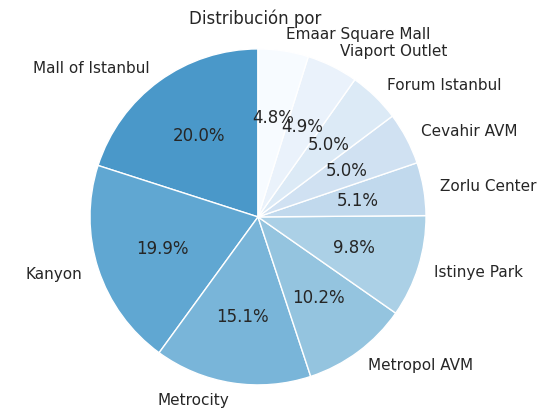

In [74]:

# Contar los valores de la columna
valores = df['shopping_mall'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Blues_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por ')
plt.axis('equal')
plt.show()

# Precios `price`

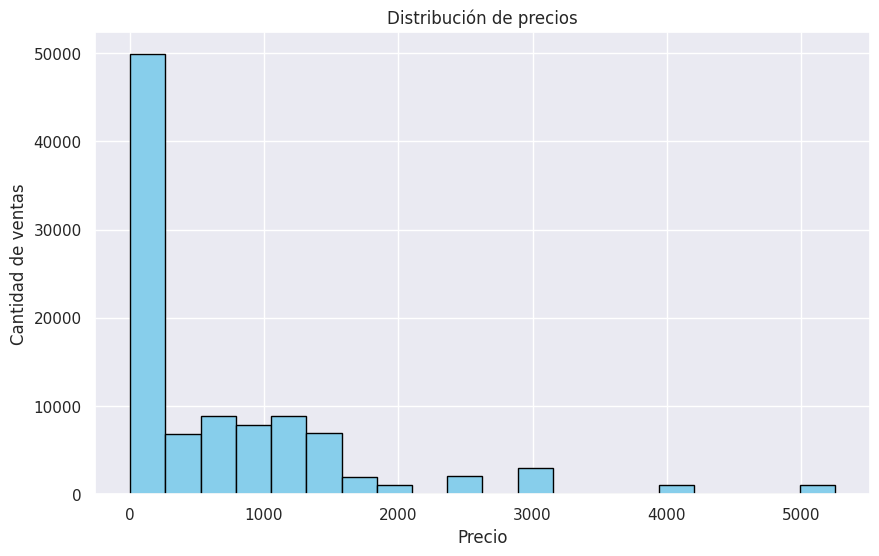

In [75]:
plt.figure(figsize=(10,6))
plt.hist(df['price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Cantidad de ventas')
plt.show()

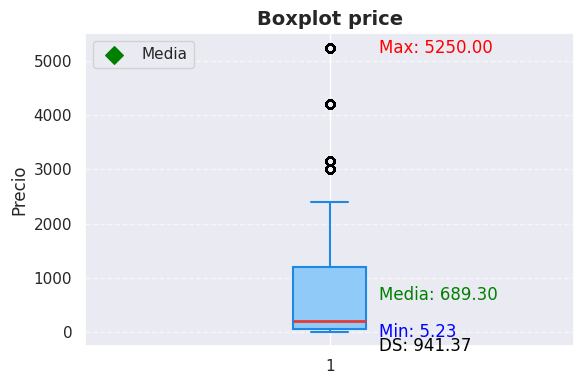

In [76]:
# 📌 Calcular estadísticas
media = df['price'].mean()
std = df['price'].std()
min_val = df['price'].min()
max_val = df['price'].max()

plt.figure(figsize=(6,4))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot price', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

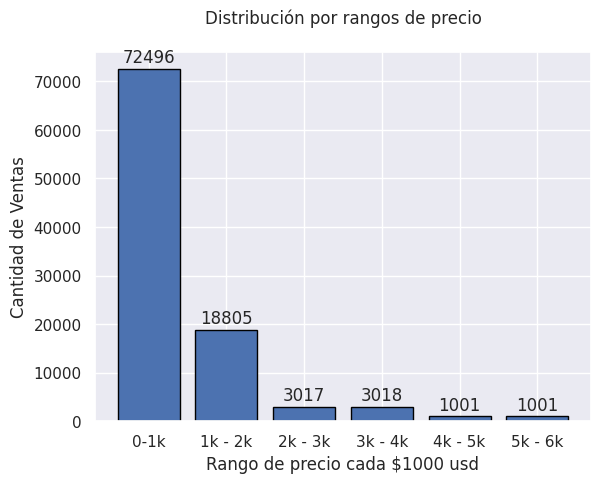

In [77]:
# Definir los intervalos
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['0-1k', '1k - 2k', '2k - 3k', '3k - 4k', '4k - 5k', '5k - 6k']

# Crear la serie auxiliar
grupo_precio = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_precio.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por rangos de precio', pad=20)
plt.xlabel('Rango de precio cada $1000 usd')
plt.ylabel('Cantidad de Ventas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

In [78]:
df_filtrado = df[(df['price'] >= 0) & (df['price'] <= 1000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
print(media)

236.6387851743544


<>:31: SyntaxWarning:

invalid escape sequence '\$'

<>:31: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-2166396579.py:31: SyntaxWarning:

invalid escape sequence '\$'



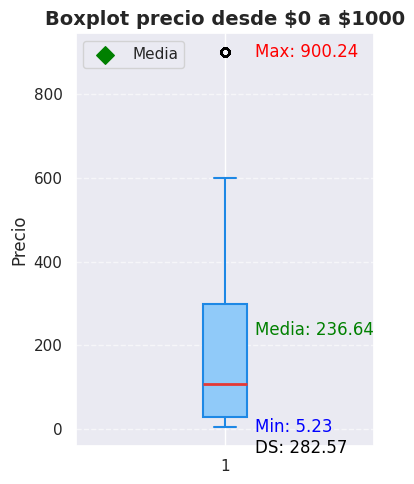

In [79]:
df_filtrado = df[(df['price'] >= 0) & (df['price'] <= 1000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$0 a \$1000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

<>:31: SyntaxWarning:

invalid escape sequence '\$'

<>:31: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-207092249.py:31: SyntaxWarning:

invalid escape sequence '\$'



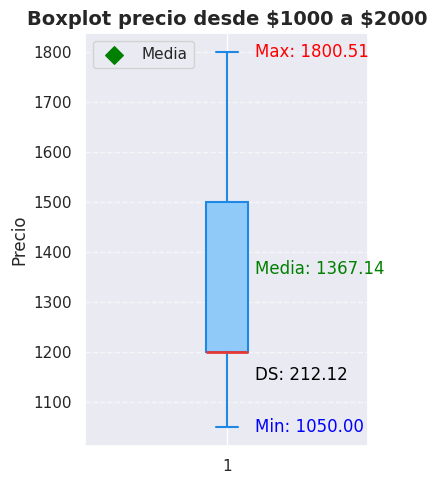

In [80]:
df_filtrado = df[(df['price'] > 1000) & (df['price'] <= 2000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$1000 a \$2000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

<>:31: SyntaxWarning:

invalid escape sequence '\$'

<>:31: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-717212317.py:31: SyntaxWarning:

invalid escape sequence '\$'



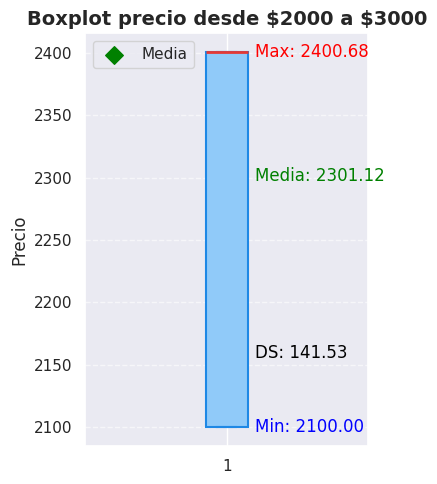

In [81]:
df_filtrado = df[(df['price'] > 2000) & (df['price'] <= 3000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$2000 a \$3000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

<>:31: SyntaxWarning:

invalid escape sequence '\$'

<>:31: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-260102915.py:31: SyntaxWarning:

invalid escape sequence '\$'



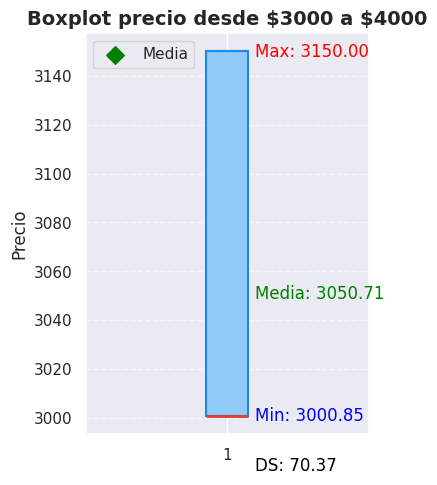

In [82]:
df_filtrado = df[(df['price'] > 3000) & (df['price'] <= 4000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$3000 a \$4000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [83]:
df_filtrado['price'].value_counts()

price
3000.85    2009
3150.00    1009
Name: count, dtype: int64

In [84]:
df_filtrado['category'].value_counts()

category
Shoes         2009
Technology    1009
Name: count, dtype: int64

In [85]:
grupo_precio = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)

porcentajes = grupo_precio.value_counts(normalize=True) * 100
print(porcentajes)

price
0-1k       72.979122
1k - 2k    18.930319
3k - 4k     3.038112
2k - 3k     3.037106
4k - 5k     1.007671
5k - 6k     1.007671
Name: proportion, dtype: float64


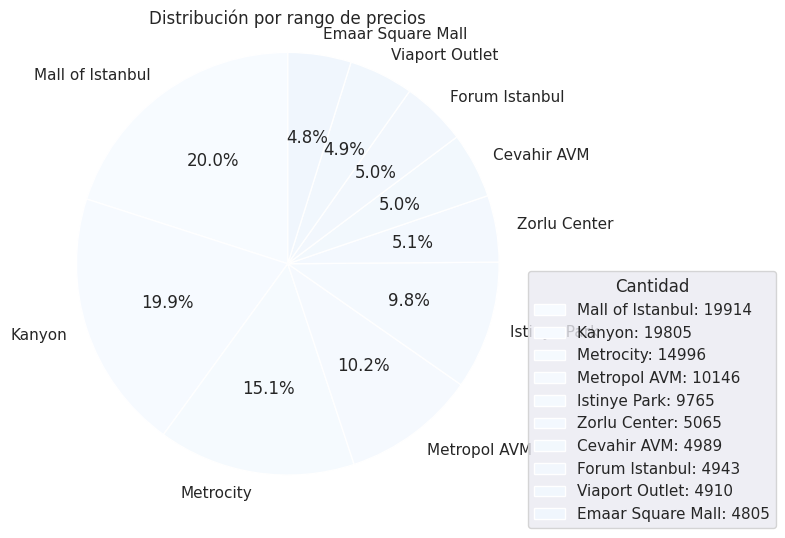

In [86]:
# Crear paleta de colores con el mismo número de categorías que valores
colores = plt.cm.Blues(range(len(valores)))

# Gráfico circular con paleta
plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores
)
plt.title('Distribución por rango de precios')
plt.axis('equal')

# Leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.show()

# Gráficos conjuntos

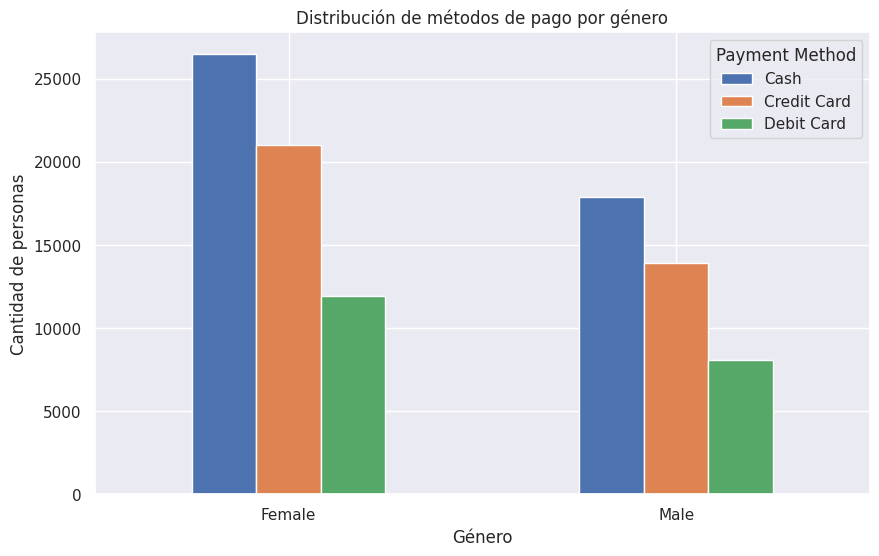

In [87]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

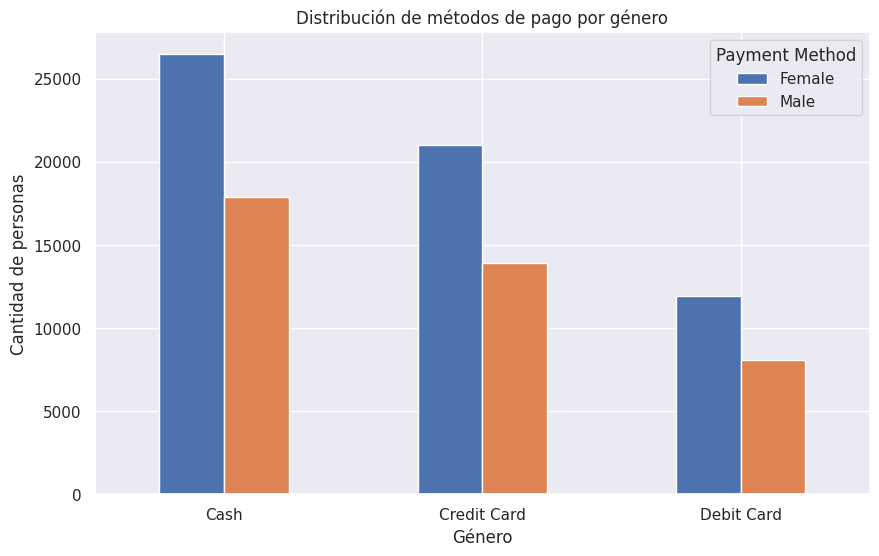

In [88]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['gender'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

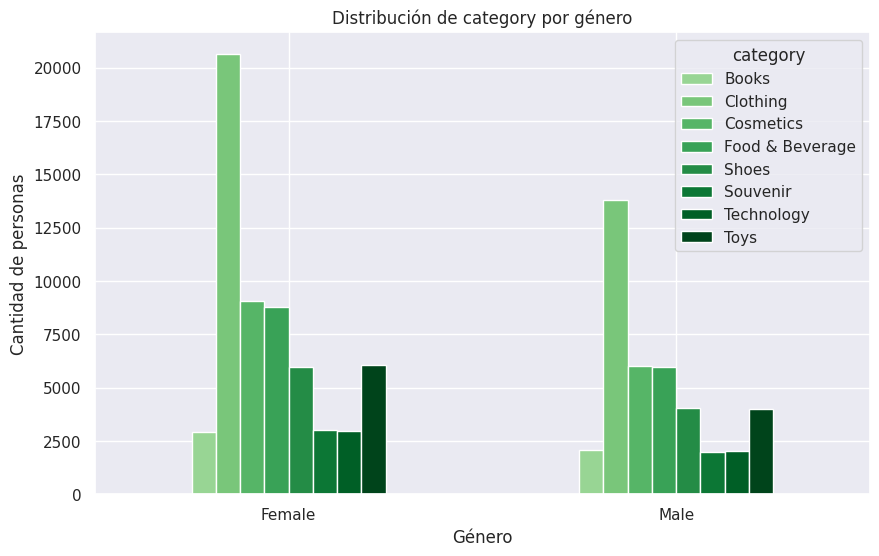

In [89]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.Greens(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

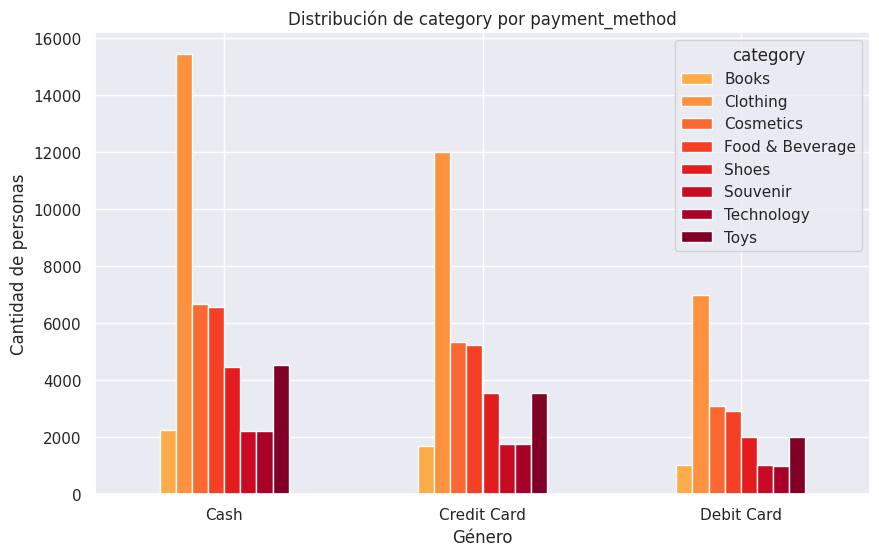

In [90]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por payment_method')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

<Axes: xlabel='payment_method', ylabel='gender'>

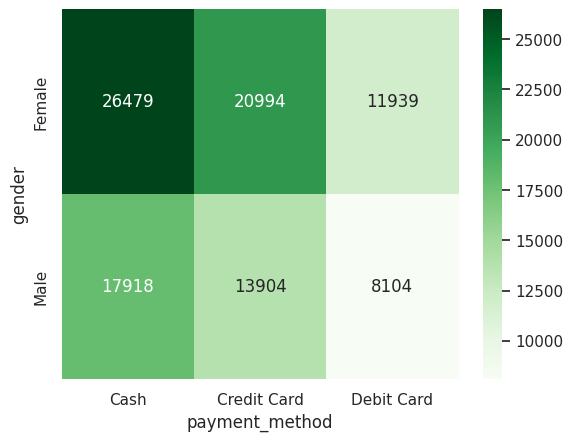

In [91]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

<Axes: xlabel='category', ylabel='gender'>

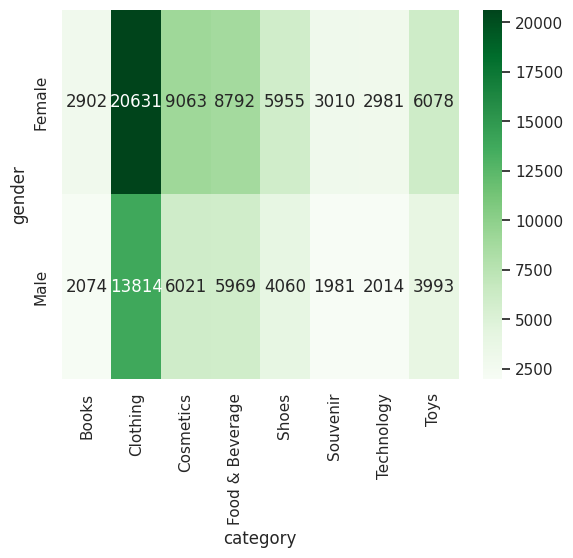

In [92]:
tabla = pd.crosstab(df['gender'], df['category'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

# Fin